In [31]:
# for data processing and neural networks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

---

Train CSV

---

In [32]:
# begining with the training data
td = pd.read_csv('emotion-labels-train.csv')

---

Test CSV

---

In [33]:
td_tester = pd.read_csv('emotion-labels-test.csv')

---

In [34]:
td.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [35]:
td_tester.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [36]:
td.dropna(inplace=True)

In [37]:
td_tester.dropna(inplace=True)

In [38]:
text_values = td['text']
target = td['label']


In [39]:
text_values_tester = td_tester['text']
target_tester = td_tester['label']

In [40]:
# download and load stopwords (words that have little or no meaning, e.g 'the', 'a', 'an', 'in', 'of', and 'and')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization support, to break a word down to its root meaning
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [41]:
# Apply text preprocessing without a function
td['clean_text'] = td['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove special characters
td['clean_text'] = td['clean_text'].str.lower()  # Convert to lowercase

# Tokenize and remove stopwords
td['clean_text'] = td['clean_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Join the tokens back into a single string
td['clean_text'] = td['clean_text'].apply(lambda x: ' '.join(x))

td['clean_text'] = td['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
td

,text,label,clean_text
0,Just got back from seeing @GaryDelaney in Burs...,joy,got back seeing garydelaney burslem amazing fa...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear evening absolute hilarity dont think l...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,waiting week game cheer friday
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,gardinerlove thank much gloria youre sweet tho...
4,I feel so blessed to work with the family that...,joy,feel blessed work family nanny nothing love am...
...,...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness,vivienlloyd thank much home stunned happy dont...
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness,put winter duvet
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,silkinside tommyjoeratliff thats pretty love s...
3611,@BluesfestByron second artist announcement loo...,sadness,bluesfestbyron second artist announcement look...


In [42]:
# Apply text preprocessing without a function
td_tester['clean_text'] = td_tester['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove special characters
td_tester['clean_text'] = td_tester['clean_text'].str.lower()  # Convert to lowercase

# Tokenize and remove stopwords
td_tester['clean_text'] = td_tester['clean_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Join the tokens back into a single string
td_tester['clean_text'] = td_tester['clean_text'].apply(lambda x: ' '.join(x))

td_tester['clean_text'] = td_tester['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
td_tester

,text,label,clean_text
0,You must be knowing #blithe means (adj.) Happ...,joy,must knowing blithe mean adj happy cheerful
1,Old saying 'A #smile shared is one gained for ...,joy,old saying smile shared one gained another day...
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,bridget jones baby bloody hilarious bridgetjon...
3,@Elaminova sparkling water makes your life spa...,joy,elaminova sparkling water make life sparkly
4,I'm tired of everybody telling me to chill out...,joy,im tired everybody telling chill everythings o...
...,...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,sadness,candice constantly pout gbbo
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,redbusin unhappy redbus cc talked week still d...
3139,"@AceOperative789 no pull him afew weeks ago, s...",sadness,aceoperative pull afew week ago sadly there ga...
3140,I'm buying art supplies and I'm debating how s...,sadness,im buying art supply im debating serious buy a...


In [43]:
# Define features and target
text_values = td['clean_text']
target = td['label']

# Assign to x (features) and y (target)
x = text_values
y = target

In [44]:
# Define features and target
text_values_tester = td_tester['clean_text']
target_tester = td_tester['label']

# Assign to x (features) and y (target)
x_tester = text_values_tester
y_tester = target_tester

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape
X_test.shape

(723,)

In [47]:
x_tester.shape
y_tester.shape

(3142,)

---

Train LogisticRegression

---

In [48]:

vectorizer = TfidfVectorizer(max_features=5000)


# Fit the vectorizer on the training data, then transform both train and test data
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


In [49]:
# vectorizer_tester = TfidfVectorizer(max_features=5000)
# x_tester = vectorizer_tester.fit_transform(x_tester).toarray()
# x_tester = vectorizer.transform(x_tester).toarray()


In [50]:
# Encode the labels if they are categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [51]:
# y_tester_encoded = label_encoder.transform(y_tester)


In [52]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train_encoded)

LogisticRegression(random_state=42)

In [53]:
lg.score(X_test, y_test_encoded)

0.8243430152143845

---

Test LogisticRegression

---

In [54]:
# Reset x_tester from raw preprocessed text
x_tester_raw = td_tester['clean_text']  # Ensure this is your preprocessed text column

# Transform using the same vectorizer as training
x_tester = vectorizer.transform(x_tester_raw).toarray()

# Encode the test labels using the same LabelEncoder
y_tester_encoded = label_encoder.transform(td_tester['label'])

# Evaluate the model
lg.score(x_tester, y_tester_encoded)




0.7959898154042011

In [55]:
# model = Sequential([
#     Dense(512, input_dim=X_train.shape[1], activation='relu'),
#     Dense(256, activation='relu'),
#     Dropout(0.5), #prevents overfitting
#     Dense(len(y_train.unique()), activation='softmax') #Add output layer
# ])
num_classes = len(np.unique(y_train_encoded))
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3269 - loss: 1.3544 - val_accuracy: 0.6211 - val_loss: 1.0733
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8740 - loss: 0.5885 - val_accuracy: 0.8253 - val_loss: 0.5141
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9837 - loss: 0.0679 - val_accuracy: 0.8287 - val_loss: 0.5280
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9883 - loss: 0.0354 - val_accuracy: 0.7993 - val_loss: 0.6026
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9891 - loss: 0.0329 - val_accuracy: 0.8045 - val_loss: 0.5977
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9868 - loss: 0.0331 - val_accuracy: 0.8218 - val_loss: 0.5616
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9897 - loss: 0.0263 - val_accuracy: 0.7889 - val_loss: 0.6725
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9903 - loss: 0.0237 - val_accuracy: 0.8010 - v

In [56]:
model.evaluate(X_test, y_test_encoded)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8120 - loss: 0.7725


[0.7638236880302429, 0.8188105225563049]

In [57]:
# Logistic Regression
lg_predictions = lg.predict(X_test)
lg_predicted_labels = label_encoder.inverse_transform(lg_predictions)

# Neural Network
nn_predictions = model.predict(X_test)
nn_predicted_labels = label_encoder.inverse_transform(np.argmax(nn_predictions, axis=1))
print("Sample Predictions:")
for i in range(10):
    print(f"Text: {X_test[i]} | LG: {lg_predicted_labels[i]} | NN: {nn_predicted_labels[i]} | Actual: {y_test.iloc[i]}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sample Predictions:
Text: [0. 0. 0. ... 0. 0. 0.] | LG: fear | NN: joy | Actual: fear
Text: [0. 0. 0. ... 0. 0. 0.] | LG: anger | NN: anger | Actual: anger
Text: [0. 0. 0. ... 0. 0. 0.] | LG: joy | NN: joy | Actual: joy
Text: [0. 0. 0. ... 0. 0. 0.] | LG: anger | NN: anger | Actual: anger
Text: [0. 0. 0. ... 0. 0. 0.] | LG: joy | NN: joy | Actual: joy
Text: [0. 0. 0. ... 0. 0. 0.] | LG: sadness | NN: sadness | Actual: sadness
Text: [0. 0. 0. ... 0. 0. 0.] | LG: fear | NN: fear | Actual: joy
Text: [0. 0. 0. ... 0. 0. 0.] | LG: joy | NN: joy | Actual: joy
Text: [0. 0. 0. ... 0. 0. 0.] | LG: sadness | NN: sadness | Actual: sadness
Text: [0. 0. 0. ... 0. 0. 0.] | LG: fear | NN: sadness | Actual: sadness


In [58]:
# Ensure that the training labels are encoded properly
lg.fit(X_train, y_train_encoded)

# 1. Predictions using Logistic Regression Model

# Predicting the test data using Logistic Regression model
lg_predictions = lg.predict(X_test)

# Convert numeric predictions back to original string labels using label_encoder
lg_predicted_labels = label_encoder.inverse_transform(lg_predictions)

# Print a few predictions with their corresponding actual labels
print("Logistic Regression Predictions:")
for i in range(100):  # Displaying first 10 predictions for example
    print(f"Predicted: {lg_predicted_labels[i]}, Actual: {y_test.iloc[i]}")

# 2. Predictions using Neural Network Model

# Predicting the test data using Neural Network model
nn_predictions = model.predict(X_test)

# Since the predictions are probabilities, take the index with the highest probability
nn_predicted_labels = label_encoder.inverse_transform(np.argmax(nn_predictions, axis=1))

# Print a few predictions with their corresponding actual labels
print("Neural Network Predictions:")
for i in range(100):  # Displaying first 10 predictions for example
    print(f"Predicted: {nn_predicted_labels[i]}, Actual: {y_test.iloc[i]}")


Logistic Regression Predictions:
Predicted: fear, Actual: fear
Predicted: anger, Actual: anger
Predicted: joy, Actual: joy
Predicted: anger, Actual: anger
Predicted: joy, Actual: joy
Predicted: sadness, Actual: sadness
Predicted: fear, Actual: joy
Predicted: joy, Actual: joy
Predicted: sadness, Actual: sadness
Predicted: fear, Actual: sadness
Predicted: anger, Actual: anger
Predicted: joy, Actual: joy
Predicted: sadness, Actual: sadness
Predicted: sadness, Actual: anger
Predicted: joy, Actual: joy
Predicted: anger, Actual: anger
Predicted: fear, Actual: fear
Predicted: joy, Actual: joy
Predicted: fear, Actual: fear
Predicted: sadness, Actual: sadness
Predicted: fear, Actual: fear
Predicted: anger, Actual: anger
Predicted: anger, Actual: anger
Predicted: fear, Actual: joy
Predicted: fear, Actual: fear
Predicted: anger, Actual: anger
Predicted: joy, Actual: joy
Predicted: sadness, Actual: fear
Predicted: sadness, Actual: sadness
Predicted: fear, Actual: fear
Predicted: sadness, Actual: f

In [59]:
# Evaluate Logistic Regression on tester data
lg_tester_score = lg.score(x_tester, y_tester_encoded)
print(f"Logistic Regression Tester Score: {lg_tester_score}")

# Get predictions for tester data
lg_tester_predictions = lg.predict(x_tester)
lg_tester_predicted_labels = label_encoder.inverse_transform(lg_tester_predictions)

# Print a few predictions vs actuals for tester data
print("\nLogistic Regression Tester Predictions:")
for i in range(100):  # Displaying first 10 examples
    print(f"Predicted: {lg_tester_predicted_labels[i]}, Actual: {td_tester['label'].iloc[i]}")


# Evaluate Neural Network on tester data
nn_tester_results = model.evaluate(x_tester, y_tester_encoded, verbose=0)
print(f"Neural Network Tester Loss: {nn_tester_results[0]}, Accuracy: {nn_tester_results[1]}")

# Get predictions for tester data
nn_tester_predictions = model.predict(x_tester)
nn_tester_predicted_labels = label_encoder.inverse_transform(np.argmax(nn_tester_predictions, axis=1))

# Print a few predictions vs actuals for tester data
print("\nNeural Network Tester Predictions:")
for i in range(10):  # Displaying first 10 examples
    print(f"Predicted: {nn_tester_predicted_labels[i]}, Actual: {td_tester['label'].iloc[i]}")



Logistic Regression Tester Score: 0.7959898154042011

Logistic Regression Tester Predictions:
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: anger, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: fear, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: fear, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: sadness, Actual: joy
Predicted: fear, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: sadness, Actual: joy
Predicted: fear, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: fear, Actual: joy
Predicted: joy, Actual:

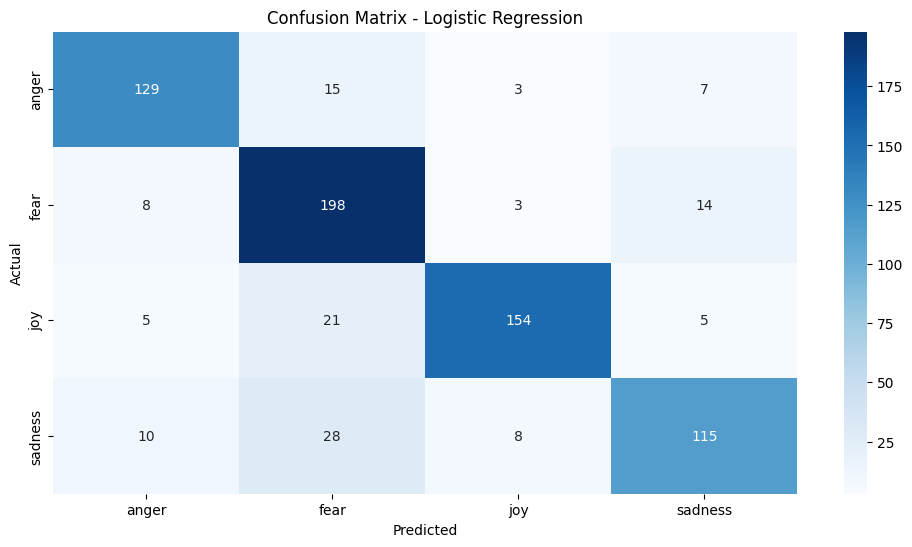

In [60]:
# Logistic Regression
cm_lg = confusion_matrix(y_test_encoded, lg_predictions)

# Neural Network
cm_nn = confusion_matrix(y_test_encoded, np.argmax(nn_predictions, axis=1))

# Visualization
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [61]:
print("Logistic Regression Report:")
print(classification_report(y_test_encoded, lg_predictions, target_names=label_encoder.classes_))

print("Neural Network Report:")
print(classification_report(y_test_encoded, np.argmax(nn_predictions, axis=1), target_names=label_encoder.classes_))


Logistic Regression Report:
              precision    recall  f1-score   support

       anger       0.85      0.84      0.84       154
        fear       0.76      0.89      0.82       223
         joy       0.92      0.83      0.87       185
     sadness       0.82      0.71      0.76       161

    accuracy                           0.82       723
   macro avg       0.83      0.82      0.82       723
weighted avg       0.83      0.82      0.82       723

Neural Network Report:
              precision    recall  f1-score   support

       anger       0.82      0.83      0.83       154
        fear       0.84      0.80      0.82       223
         joy       0.85      0.88      0.87       185
     sadness       0.75      0.76      0.76       161

    accuracy                           0.82       723
   macro avg       0.82      0.82      0.82       723
weighted avg       0.82      0.82      0.82       723



---

TEST SECTION

---



Logistic Regression Tester Score: 0.7959898154042011

Logistic Regression Tester Predictions:
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: anger, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Neural Network Tester Loss: 0.9998255372047424, Accuracy: 0.742838978767395
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Neural Network Tester Predictions:
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy
Predicted: joy, Actual: joy


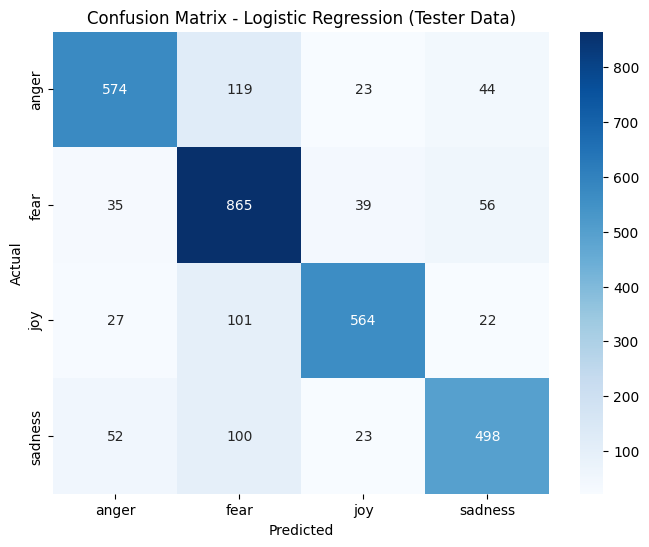

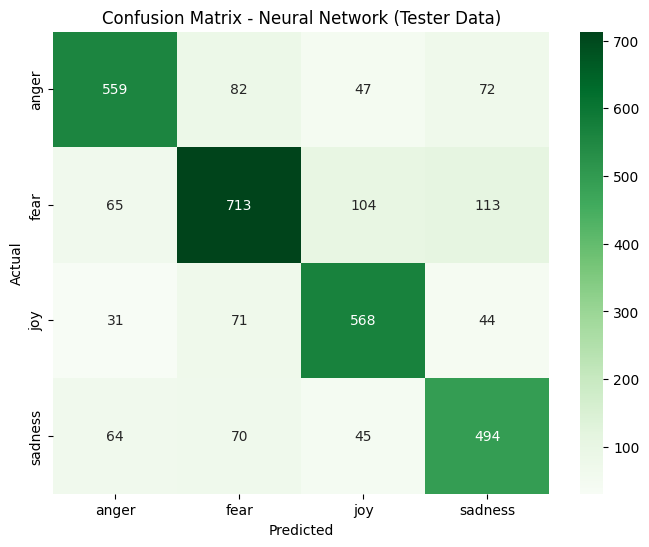

In [62]:
# Logistic Regression Tester Evaluation
lg_tester_score = lg.score(x_tester, y_tester_encoded)
print(f"Logistic Regression Tester Score: {lg_tester_score}")

lg_tester_predictions = lg.predict(x_tester)
lg_tester_predicted_labels = label_encoder.inverse_transform(lg_tester_predictions)
print("\nLogistic Regression Tester Predictions:")
for i in range(10):
    print(f"Predicted: {lg_tester_predicted_labels[i]}, Actual: {td_tester['label'].iloc[i]}")

# Neural Network Tester Evaluation
nn_tester_results = model.evaluate(x_tester, y_tester_encoded, verbose=0)
print(f"Neural Network Tester Loss: {nn_tester_results[0]}, Accuracy: {nn_tester_results[1]}")

nn_tester_predictions = model.predict(x_tester)
nn_tester_predicted_labels = label_encoder.inverse_transform(np.argmax(nn_tester_predictions, axis=1))
print("\nNeural Network Tester Predictions:")
for i in range(10):
    print(f"Predicted: {nn_tester_predicted_labels[i]}, Actual: {td_tester['label'].iloc[i]}")

# Confusion Matrices
cm_lg_tester = confusion_matrix(y_tester_encoded, lg_tester_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg_tester, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression (Tester Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_nn_tester = confusion_matrix(y_tester_encoded, np.argmax(nn_tester_predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_tester, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Neural Network (Tester Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [63]:
# Logistic Regression Reports
print("Logistic Regression Training Report:")
print(classification_report(y_test_encoded, lg.predict(X_test), target_names=label_encoder.classes_))

print("Logistic Regression Tester Report:")
lg_tester_predictions = lg.predict(x_tester)
print(classification_report(y_tester_encoded, lg_tester_predictions, target_names=label_encoder.classes_))

# Neural Network Reports
print("Neural Network Training Report:")
nn_training_predictions = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test_encoded, nn_training_predictions, target_names=label_encoder.classes_))

print("Neural Network Tester Report:")
nn_tester_predictions = model.predict(x_tester)
nn_tester_predicted_labels = np.argmax(nn_tester_predictions, axis=1)
print(classification_report(y_tester_encoded, nn_tester_predicted_labels, target_names=label_encoder.classes_))


Logistic Regression Training Report:
              precision    recall  f1-score   support

       anger       0.85      0.84      0.84       154
        fear       0.76      0.89      0.82       223
         joy       0.92      0.83      0.87       185
     sadness       0.82      0.71      0.76       161

    accuracy                           0.82       723
   macro avg       0.83      0.82      0.82       723
weighted avg       0.83      0.82      0.82       723

Logistic Regression Tester Report:
              precision    recall  f1-score   support

       anger       0.83      0.76      0.79       760
        fear       0.73      0.87      0.79       995
         joy       0.87      0.79      0.83       714
     sadness       0.80      0.74      0.77       673

    accuracy                           0.80      3142
   macro avg       0.81      0.79      0.80      3142
weighted avg       0.80      0.80      0.80      3142

Neural Network Training Report:
23/23 ━━━━━━━━━━━━━━━━━━━━

In [64]:
# Install Hugging Face Transformers library
!pip install transformers

# Import necessary libraries
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForSequenceClassification, BartConfig, AdamW

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your datasets
train_data = pd.read_csv('emotion-labels-train.csv')
test_data = pd.read_csv('emotion-labels-test.csv')

# Encode labels
label_encoder = LabelEncoder()
train_data['label_encoded'] = label_encoder.fit_transform(train_data['label'])
test_data['label_encoded'] = label_encoder.transform(test_data['label'])

# Split text and labels
X_train, y_train = train_data['text'], train_data['label_encoded']
X_test, y_test = test_data['text'], test_data['label_encoded']

# Define a custom PyTorch Dataset for BART
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):  # Reduced max_length to 256
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Initialize the tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')

# Create datasets
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)

# Create DataLoaders with reduced batch size
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Reduced batch size to 8
test_loader = DataLoader(test_dataset, batch_size=8)

# Load BART model with custom classification head
num_labels = len(label_encoder.classes_)
config = BartConfig.from_pretrained('facebook/bart-large-mnli', num_labels=num_labels)
model = BartForSequenceClassification.from_pretrained(
    'facebook/bart-large-mnli',
    config=config,
    ignore_mismatched_sizes=True
)
model.classification_head.out_proj = torch.nn.Linear(config.d_model, num_labels)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing
model = model.to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Use mixed precision training
from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        with autocast():  # Enable mixed precision
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        total_loss += loss.item()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

    # Clear CUDA memory
    torch.cuda.empty_cache()

# Evaluate the model on the test set
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Save the fine-tuned model
model.save_pretrained('./bart-sentiment-model')
tokenizer.save_pretrained('./bart-sentiment-model')

# Download the saved model from Colab (optional)
from google.colab import files
!zip -r bart-sentiment-model.zip ./bart-sentiment-model
files.download('bart-sentiment-model.zip')


Using device: cpu


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized because the shapes did not match:
- classification_head.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
- classification_head.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-64-ca256c9f4e0e>:84: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.Gr

KeyboardInterrupt: 